In [17]:
import os
import pandas as pd
import datetime
from epiweeks import Week, Year
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pycaret.utils import version
#import scikit-plot
from datetime import datetime

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Load Statsmodels for Stationarity
#import statsmodels.api as sm

In [2]:
version()
#Resource:https://medium.com/@janmejoy.mi650/getting-started-with-pycaret-1-0-0-part-1-4844fe4108ad

'2.2.3'

In [4]:
#wnv= pd.DataFrame(columns = ['year', 'mmwr_week', 'county', 'case_count'])
path1=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_temp_wnv_cases_2.csv'

df=pd.read_csv(path1)
df.head()
df.drop(columns=['Unnamed: 0', 'county'], inplace=True)

In [5]:
df.shape
df.dtypes

mmwr_enddate          object
ppt (mm)             float64
tmean (degrees C)    float64
case_count           float64
dtype: object

In [6]:
#df['mmwr_week']=pd.to_datetime(df['mmwr_enddate'])
#data=df.drop(columns=['mmwr_enddate'])
#data.index=data.Date_Time
df.set_index('mmwr_enddate', inplace=True)
df.index = pd.to_datetime(df.index)

df.head()

,ppt (mm),tmean (degrees C),case_count
mmwr_enddate,,,
2006-01-07,9.561429,10.342857,0.0
2006-01-14,1.148571,9.557143,0.0
2006-01-21,3.211429,8.000000,0.0
2006-01-28,0.437143,8.657143,0.0
2006-02-04,2.841429,11.185714,0.0


In [106]:
#data.dtypes
df.head()
df.index

DatetimeIndex(['2006-01-07', '2006-01-14', '2006-01-21', '2006-01-28',
               '2006-02-04', '2006-02-11', '2006-02-18', '2006-02-25',
               '2006-03-04', '2006-03-11',
               ...
               '2021-07-31', '2021-08-07', '2021-08-14', '2021-08-21',
               '2021-08-28', '2021-09-04', '2021-09-11', '2021-09-18',
               '2021-09-25', '2021-10-02'],
              dtype='datetime64[ns]', name='mmwr_enddate', length=47676, freq=None)

In [18]:
df['month']=df.index.month
df.head(10)

,ppt (mm),tmean (degrees C),case_count,month,year
mmwr_enddate,,,,,
2006-01-07,9.561429,10.342857,0.0,1,2006
2006-01-14,1.148571,9.557143,0.0,1,2006
2006-01-21,3.211429,8.000000,0.0,1,2006
2006-01-28,0.437143,8.657143,0.0,1,2006
2006-02-04,2.841429,11.185714,0.0,2,2006
2006-02-11,0.094286,11.171429,0.0,2,2006
2006-02-18,0.532857,9.714286,0.0,2,2006
2006-02-25,0.222857,7.442857,0.0,2,2006
2006-03-04,6.954286,9.871429,0.0,3,2006


In [8]:
df['year']=df.index.year

In [10]:
mdf=df.reset_index()
mdf.drop(columns=['mmwr_enddate'], inplace=True)
mdf

,ppt (mm),tmean (degrees C),case_count,month,year
0,9.561429,10.342857,0.0,1,2006
1,1.148571,9.557143,0.0,1,2006
2,3.211429,8.000000,0.0,1,2006
3,0.437143,8.657143,0.0,1,2006
4,2.841429,11.185714,0.0,2,2006
...,...,...,...,...,...
47671,0.000000,24.242857,0.0,9,2021
47672,0.127143,27.285714,0.0,9,2021
47673,0.000000,24.042857,0.0,9,2021
47674,0.371429,23.185714,0.0,9,2021


In [12]:
new=mdf.groupby(['year','month']).aggregate({'ppt (mm)':'mean', 'tmean (degrees C)': 'mean','case_count':'sum' })

In [19]:
new['day']="1"
new.head()

,year,month,ppt (mm),tmean (degrees C),case_count,day
0,2006,1,5.252297,7.282204,0.0,1
1,2006,2,1.665653,8.541318,0.0,1
2,2006,3,7.542611,6.448892,0.0,1
3,2006,4,5.905946,10.255616,0.0,1
4,2006,5,0.844871,17.492365,0.0,1


In [15]:
new.reset_index(inplace=True)
new

,year,month,ppt (mm),tmean (degrees C),case_count
0,2006,1,5.252297,7.282204,0.0
1,2006,2,1.665653,8.541318,0.0
2,2006,3,7.542611,6.448892,0.0
3,2006,4,5.905946,10.255616,0.0
4,2006,5,0.844871,17.492365,0.0
...,...,...,...,...,...
185,2021,6,0.126342,21.492919,0.0
186,2021,7,0.067453,25.247882,4.0
187,2021,8,0.011927,23.782389,22.0
188,2021,9,0.263387,22.899076,31.0


In [21]:
new["month_date"] = pd.to_datetime(new[['month', 'day', 'year']])
new.tail(20)

,year,month,ppt (mm),tmean (degrees C),case_count,day,month_date
170,2020,3,3.214261,8.818966,0.0,1,2020-03-01
171,2020,4,2.357931,11.711700,0.0,1,2020-04-01
172,2020,5,1.139768,17.508966,0.0,1,2020-05-01
173,2020,6,0.258688,20.194643,1.0,1,2020-06-01
174,2020,7,0.022789,22.617303,3.0,1,2020-07-01
175,2020,8,0.050704,25.003547,30.0,1,2020-08-01
176,2020,9,0.049390,22.860099,56.0,1,2020-09-01
177,2020,10,0.057044,19.976010,64.0,1,2020-10-01
178,2020,11,1.455757,10.774631,20.0,1,2020-11-01
179,2020,12,1.791718,8.604433,22.0,1,2020-12-01


In [25]:
df=new.drop(columns=['year', 'month', 'day'])
df.head()

,ppt (mm),tmean (degrees C),case_count,month_date
0,5.252297,7.282204,0.0,2006-01-01
1,1.665653,8.541318,0.0,2006-02-01
2,7.542611,6.448892,0.0,2006-03-01
3,5.905946,10.255616,0.0,2006-04-01
4,0.844871,17.492365,0.0,2006-05-01


In [36]:
df.set_index('month_date', inplace=True)

In [37]:
df

,ppt (mm),tmean (degrees C),case_count
month_date,,,
2006-01-01,5.252297,7.282204,0.0
2006-02-01,1.665653,8.541318,0.0
2006-03-01,7.542611,6.448892,0.0
2006-04-01,5.905946,10.255616,0.0
2006-05-01,0.844871,17.492365,0.0
...,...,...,...
2021-06-01,0.126342,21.492919,0.0
2021-07-01,0.067453,25.247882,4.0
2021-08-01,0.011927,23.782389,22.0


In [24]:
#Making into monhtly data
#mdf=df.to_period('M')

#takes mean of case_counts

# Creating Model

Source: https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

# 5. Visualize the Time Series

IndexError: index 3 is out of bounds for axis 0 with size 3

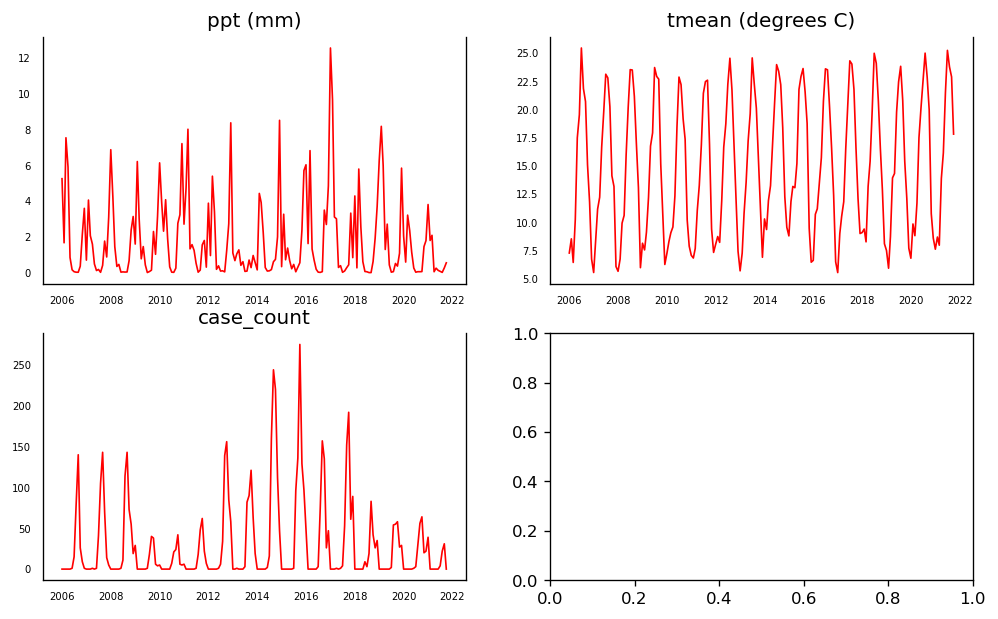

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# 6. Testing Causation using Granger’s Causality Test

In [44]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,ppt (mm)_x,tmean (degrees C)_x,case_count_x
ppt (mm)_y,1.0000,0.0,0.0
tmean (degrees C)_y,0.2748,1.0,0.0
case_count_y,0.0000,0.0,1.0


If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

- All good except ppt

# 7. Cointegration Test

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series. 

In [45]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
ppt (mm) ::  81.69     > 24.2761   =>   True
tmean (degrees C) ::  24.9      > 12.3212   =>   True
case_count ::  0.35      > 4.1296    =>   False


# 8. Split the Series into Training and Testing Data

In [51]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(186, 3)
(4, 3)


# 9. Checking for Stationarity and Make Series Stationary

In [52]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   
        
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ppt (mm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.598
 No. Lags Chosen       = 12
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0934. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "tmean (degrees C)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5807
 No. Lags Chosen       = 14
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.4933. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "case_count" 
    -----------------------------------------------
 Null Hypo

The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

In [53]:
df_differenced = df_train.diff().dropna()

In [54]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "ppt (mm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.039
 No. Lags Chosen       = 11
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "tmean (degrees C)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.755
 No. Lags Chosen       = 13
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "case_count" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signif

# 10. How to Select the Order (P) of VAR model

In [56]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  10.75916603260378
BIC :  10.968835755926104
FPE :  47060.37288293778
HQIC:  10.84414778516106 

Lag Order = 2
AIC :  10.462222567969693
BIC :  10.83052425764002
FPE :  34973.10451414775
HQIC:  10.61151334064683 

Lag Order = 3
AIC :  10.257209131380359
BIC :  10.785342101777632
FPE :  28496.640649245935
HQIC:  10.471306553019025 

Lag Order = 4
AIC :  10.229362530783812
BIC :  10.918541449122857
FPE :  27725.444463761614
HQIC:  10.508770403745826 

Lag Order = 5
AIC :  10.097758098384817
BIC :  10.949213258622207
FPE :  24322.79995715591
HQIC:  10.442986501444347 

Lag Order = 6
AIC :  10.018261228728514
BIC :  11.033238831705738
FPE :  22486.476582802068
HQIC:  10.429826622058226 

Lag Order = 7
AIC :  9.61446632771938
BIC :  10.794228767715321
FPE :  15037.12424199191
HQIC:  10.09289166001864 

Lag Order = 8
AIC :  9.433649564686258
BIC :  10.779475722556525
FPE :  12573.585043338004
HQIC:  9.979464382500563 

Lag Order = 9
AIC :  9.2062027109019
BIC :  10.719388

C:\Users\Maria\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Choose lag 12 because its the lowest before it starts again

In [57]:
# Another way to find lag number
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,11.47,11.52,9.546e+04,11.49
1,10.76,10.98,4.699e+04,10.85
2,10.52,10.92,3.708e+04,10.68
3,10.31,10.88,3.017e+04,10.54
4,10.34,11.08,3.103e+04,10.64
5,10.14,11.05,2.550e+04,10.51
6,10.09,11.17,2.423e+04,10.53
7,9.733,10.98,1.695e+04,10.24
8,9.536,10.95,1.394e+04,10.11
9,9.340,10.92,1.150e+04,9.982


This recomend lag 14...

# 11. Train the VAR Model of Selected Order(p)

In [58]:
model_fitted = model.fit(14)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jan, 2022
Time:                     12:24:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    11.1034
Nobs:                     171.000    HQIC:                   9.69505
Log likelihood:          -1345.62    FPE:                    6415.39
AIC:                      8.73339    Det(Omega_mle):         3273.18
--------------------------------------------------------------------
Results for equation ppt (mm)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.033426         0.130975           -0.255           0.799
L1.ppt (mm)                  -0.833515         0.086477           -9.639           0.000
L1.tmean (degrees C)     

# 12. Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [60]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))

ppt (mm) : 2.03
tmean (degrees C) : 1.99
case_count : 2.03


The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation

looks pretty good.

# 13. How to Forecast VAR model using statsmodels

In [62]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 14

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

14


array([[-1.21816256e+00,  5.79726601e+00,  0.00000000e+00],
       [-8.81080049e-01,  2.68567734e+00,  1.00000000e+00],
       [-2.35899015e-01,  2.42266010e+00,  2.00000000e+00],
       [ 2.79150246e-02,  2.38624384e+00,  2.70000000e+01],
       [-1.31403941e-03, -2.14344828e+00,  2.60000000e+01],
       [ 7.65394089e-03, -2.88408867e+00,  8.00000000e+00],
       [ 1.39871305e+00, -9.20137931e+00, -4.40000000e+01],
       [ 3.35960591e-01, -2.17019704e+00,  2.00000000e+00],
       [ 2.01673522e+00, -9.83596059e-01,  1.70000000e+01],
       [-2.01156281e+00,  1.07990148e+00, -3.90000000e+01],
       [ 2.89396552e-01, -7.24568966e-01,  0.00000000e+00],
       [-2.03802340e+00,  5.91483990e+00,  0.00000000e+00],
       [ 2.00293103e-01,  2.27514778e+00,  0.00000000e+00],
       [-1.22214286e-01,  5.32676108e+00,  0.00000000e+00]])

In [70]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,ppt (mm)_1d,tmean (degrees C)_1d,case_count_1d
month_date,,,
2021-07-01,-1.016027,2.406121,9.736843
2021-08-01,-0.207926,1.204897,33.932535
2021-09-01,0.698527,-2.745387,46.365246
2021-10-01,-0.217559,-3.243547,-25.721104


negative case count doest make sense.. must be due to invertion

# 14. Invert the transformation to get the real forecast

In [89]:
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        #if first_diff:
         #   df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [90]:
df_results = invert_transformation(df_train, df_forecast) #changed to first diff        
df_results.loc[:, ['ppt (mm)_forecast', 'tmean (degrees C)_forecast', 'case_count_forecast']]

,ppt (mm)_forecast,tmean (degrees C)_forecast,case_count_forecast
month_date,,,
2021-07-01,-0.889684,23.899040,9.736843
2021-08-01,-1.097610,25.103937,43.669378
2021-09-01,-0.399083,22.358550,90.034625
2021-10-01,-0.616642,19.115003,64.313521


In [66]:
df.columns

Index(['ppt (mm)', 'tmean (degrees C)', 'case_count'], dtype='object')

# 15. Plot of Forecast vs Actuals

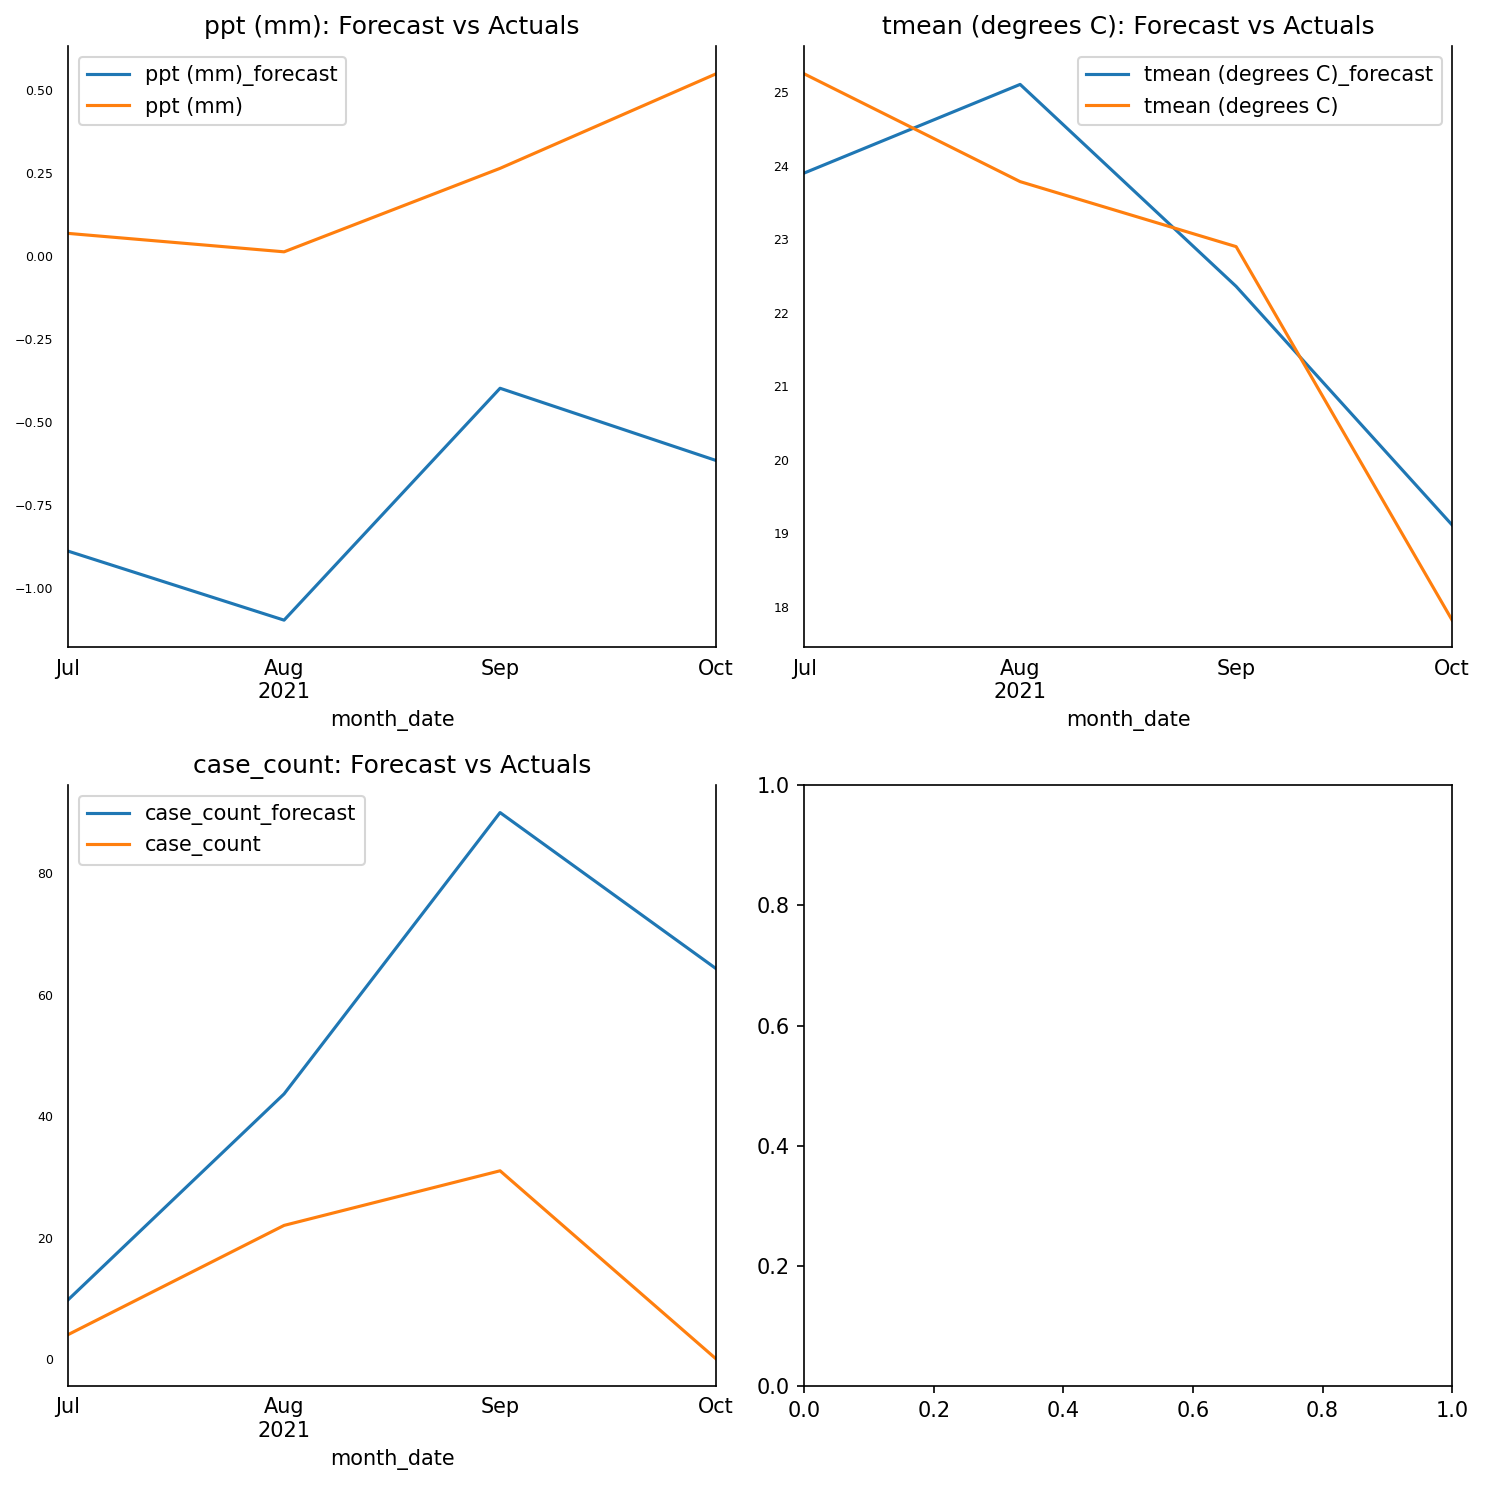

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# 16. Evaluate the Forecasts

In [77]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [ ]:
'ppt (mm)_forecast', 'tmean (degrees C)_forecast', 'case_count_forecast'

In [79]:
print('Forecast Accuracy of: ppt (mm)')
accuracy_prod = forecast_accuracy(df_results['ppt (mm)_forecast'].values, df_test['ppt (mm)'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: ppt (mm)
mape :  27.9636
me :  -0.9735
mae :  0.9735
mpe :  -27.9636
rmse :  0.9928
corr :  0.6858
minmax :  27.9636


C:\Users\Maria\AppData\Local\Temp/ipykernel_16264/3132832150.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\Maria\AppData\Local\Temp/ipykernel_16264/3132832150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [80]:
print('Forecast Accuracy of: tmean (degrees C)')
accuracy_prod = forecast_accuracy(df_results['tmean (degrees C)_forecast'].values, df_test['tmean (degrees C)'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: tmean (degrees C)
mape :  0.0513
me :  0.1813
mae :  1.126
mpe :  0.0128
rmse :  1.1758
corr :  0.9164
minmax :  0.0493


C:\Users\Maria\AppData\Local\Temp/ipykernel_16264/3132832150.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\Maria\AppData\Local\Temp/ipykernel_16264/3132832150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [81]:
print('Forecast Accuracy of: case_count')
accuracy_prod = forecast_accuracy(df_results['case_count_forecast'].values, df_test['case_count'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: case_count
mape :  inf
me :  37.6886
mae :  37.6886
mpe :  inf
rmse :  45.066
corr :  0.5547
minmax :  0.6853


C:\Users\Maria\AppData\Local\Temp/ipykernel_16264/3132832150.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\Maria\AppData\Local\Temp/ipykernel_16264/3132832150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


# Try with Lag 12.

In [83]:
#Step 11
model_fitted = model.fit(12)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jan, 2022
Time:                     13:17:52
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.7692
Nobs:                     173.000    HQIC:                   9.56677
Log likelihood:          -1381.96    FPE:                    6413.06
AIC:                      8.74597    Det(Omega_mle):         3585.46
--------------------------------------------------------------------
Results for equation ppt (mm)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.023821         0.136303           -0.175           0.861
L1.ppt (mm)                  -0.753048         0.085455           -8.812           0.000
L1.tmean (degrees C)     

In [84]:
#Step 12
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))

ppt (mm) : 2.08
tmean (degrees C) : 1.97
case_count : 1.94


In [85]:
#Step 13
lag_order = model_fitted.k_ar
print(lag_order)  #> 14

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

12


array([[-2.35899015e-01,  2.42266010e+00,  2.00000000e+00],
       [ 2.79150246e-02,  2.38624384e+00,  2.70000000e+01],
       [-1.31403941e-03, -2.14344828e+00,  2.60000000e+01],
       [ 7.65394089e-03, -2.88408867e+00,  8.00000000e+00],
       [ 1.39871305e+00, -9.20137931e+00, -4.40000000e+01],
       [ 3.35960591e-01, -2.17019704e+00,  2.00000000e+00],
       [ 2.01673522e+00, -9.83596059e-01,  1.70000000e+01],
       [-2.01156281e+00,  1.07990148e+00, -3.90000000e+01],
       [ 2.89396552e-01, -7.24568966e-01,  0.00000000e+00],
       [-2.03802340e+00,  5.91483990e+00,  0.00000000e+00],
       [ 2.00293103e-01,  2.27514778e+00,  0.00000000e+00],
       [-1.22214286e-01,  5.32676108e+00,  0.00000000e+00]])

In [92]:
#Step 14
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        #if first_diff:
         #   df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast) #changed to first diff        
df_results.loc[:, ['ppt (mm)_forecast', 'tmean (degrees C)_forecast', 'case_count_forecast']]

,ppt (mm)_forecast,tmean (degrees C)_forecast,case_count_forecast
month_date,,,
2021-07-01,-0.889684,23.899040,9.736843
2021-08-01,-1.097610,25.103937,43.669378
2021-09-01,-0.399083,22.358550,90.034625
2021-10-01,-0.616642,19.115003,64.313521


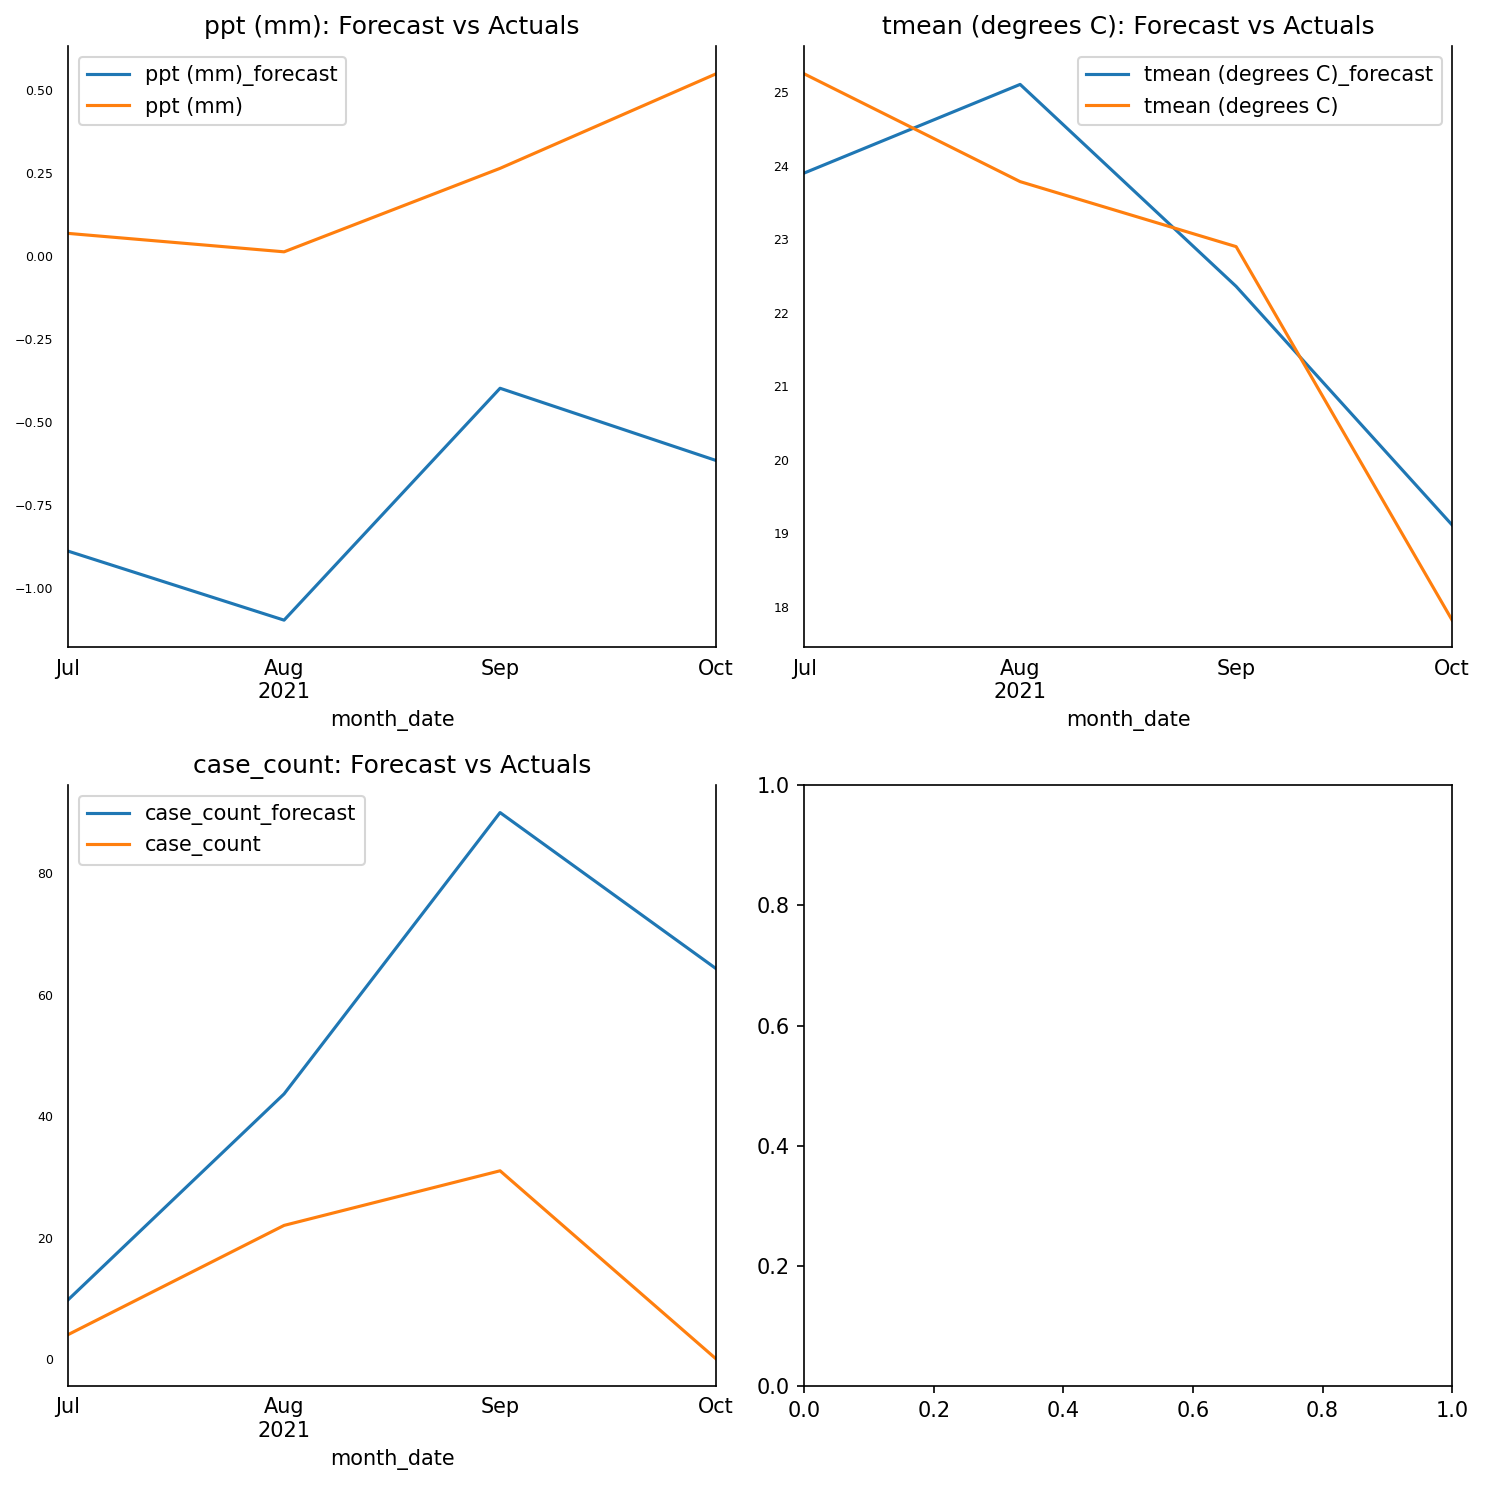

In [93]:
#Step 15
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

The case count forecast is much high than expected. This could be because of the pandemic where social distancing guidelines reduced the number of cases spread/reported. 

After conducting more indepth research on the model, it was decided that VAR is not the best model for our seasonal dataset. Instead, we will look into ARIMA, Linear Regression, then Power Law.